<a href="https://colab.research.google.com/github/CorraleH/LitStudy-MR/blob/main/LitStudy_MR_COFAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adicona acesso do Google Drive ao Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instala a biblioteca LitStudy https://nlesc.github.io/litstudy/

In [ ]:
pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 831.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50023 sha256=f96f2dca511fe308f8f5ef2029ef4cd24b5248294fee3d07aec5ccd955ca8141
  Stored in directory: /root/.cache/pip/wheels/72/97/1c/6327aca

Importa bibliotecas complementares e LitStudy

In [ ]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

Importa as publicações da base de dados Scopus e aplica propriedade *unique* para remover duplicatas

In [ ]:
scopus = litstudy.load_scopus_csv("/content/drive/MyDrive/ScR-LitStudy/Scopus.csv")
print(len(scopus), 'publications loaded from Scopus')
scopus = litstudy.types.DocumentSet.unique(scopus)
print(len(scopus), 'publications selected from Scopus')

1147 publications loaded from Scopus
1147 publications selected from Scopus


Importa as publicações da base de dados IEEE Xplore e aplica propriedade *unique* para remover duplicatas

In [ ]:
ieee = litstudy.load_ieee_csv("/content/drive/MyDrive/ScR-LitStudy/IEEEXplore.csv")
print(len(ieee), 'publications loaded from  IEEE Xplore')
ieee = litstudy.types.DocumentSet.unique(ieee)
print(len(ieee), 'publications selected from  IEEE Xplore')

489 publications loaded from  IEEE Xplore
489 publications selected from  IEEE Xplore


Importa as publicações da base de dados SpringerLink e aplica propriedade *unique* para remover duplicatas

In [ ]:
springer = litstudy.load_springer_csv("/content/drive/MyDrive/ScR-LitStudy/SpringerLink.csv")
print(len(springer), 'publications loaded from SpringerLink')
springer = litstudy.types.DocumentSet.unique(springer)
print(len(springer), 'publications selected from SpringerLink')

278 publications loaded from SpringerLink
278 publications selected from SpringerLink


Importa as publicações da base de dados ACM e aplica propriedade *unique* para remover duplicatas

In [ ]:
acm = litstudy.load_bibtex("/content/drive/MyDrive/ScR-LitStudy/ACM.bib")
print(len(acm), 'publications loaded from ACM')
acm = litstudy.types.DocumentSet.unique(acm)
print(len(acm), 'publications selected from ACM')

56 publications loaded from ACM
56 publications selected from ACM


Importa as publicações da base de dados PubMed e aplica propriedade *unique* para remover duplicatas

In [ ]:
medline = litstudy.load_csv("/content/drive/MyDrive/ScR-LitStudy/PubMed.csv", title_field="Title",authors_field="Authors",date_field="Publication Year")
print(len(medline), 'publications loaded from PubMed')
medline = litstudy.types.DocumentSet.unique(medline)
print(len(medline), 'publications selected from PubMed')

491 publications loaded from PubMed
491 publications selected from PubMed


Contatena todas as bases de dados em um tipo de dado: *docs*

In [ ]:
docs = scopus
print(len(docs), 'publications loaded from sources')
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')
docs = docs + ieee
print(len(docs), 'publications loaded from sources')
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')
docs = docs + acm
print(len(docs), 'publications loaded from sources')
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')
docs = docs + medline
print(len(docs), 'publications loaded from sources')
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')
docs = docs + springer
print(len(docs), 'publications loaded from sources')
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')

1147 publications loaded from sources
1147 publications selected
1636 publications loaded from sources
1489 publications selected
1545 publications loaded from sources
1506 publications selected
1997 publications loaded from sources
1674 publications selected
1952 publications loaded from sources
1950 publications selected


Aplicação da propriedade *unique* para remoção de publicações duplicadas

In [ ]:
print(len(docs))
docs = litstudy.types.DocumentSet.unique(docs)
print(len(docs), 'publications selected')

2461
1950 publications selected


In [ ]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
absolute_shrinkage,7
amyotrophic_lateral,5
annual_meeting,14
artificial_intelligence,275
attribution_license,23
...,...
white_matter,5
wiley_periodicals,15
wiley_vch,5
wolters_kluwer,12


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
num_topics = 10
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)


In [ ]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['sound', 'localization', 'audio', 'source', 'signal']
Topic 2: ['sign', 'sign_language', 'language', 'communication', 'translation']
Topic 3: ['prediction', 'patients', 'disease', 'model', 'machine']
Topic 4: ['robot', 'technology', 'intelligence', 'interaction', 'artificial']
Topic 5: ['tinnitus', 'eeg', 'treatment', 'encyclopedia', 'brain']
Topic 6: ['speech', 'noise', 'music', 'emotion', 'listeners']
Topic 7: ['abstract', 'annual', 'annual_meeting', 'meeting', 'medicine']
Topic 8: ['engineering', 'conference', 'biomedical', 'international', 'congress']
Topic 9: ['age', 'loss', 'audiogram', 'auditory', 'threshold']
Topic 10: ['gestures', 'hand', 'recognition', 'communication', 'people']


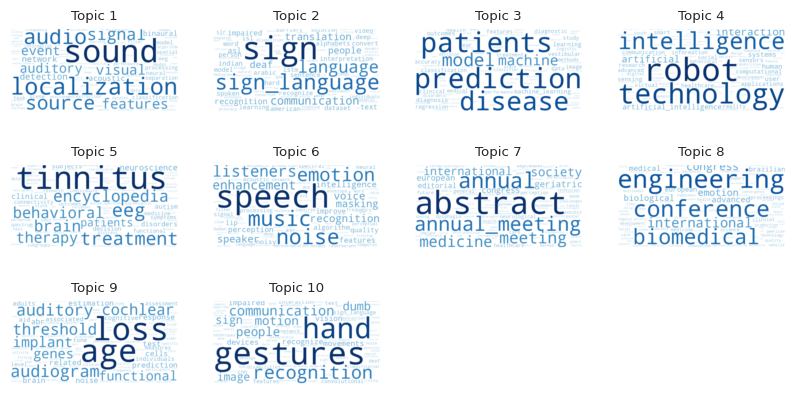

In [ ]:
plt.figure(figsize=(10, 5))
litstudy.plot_topic_clouds(topic_model, ncols=4);

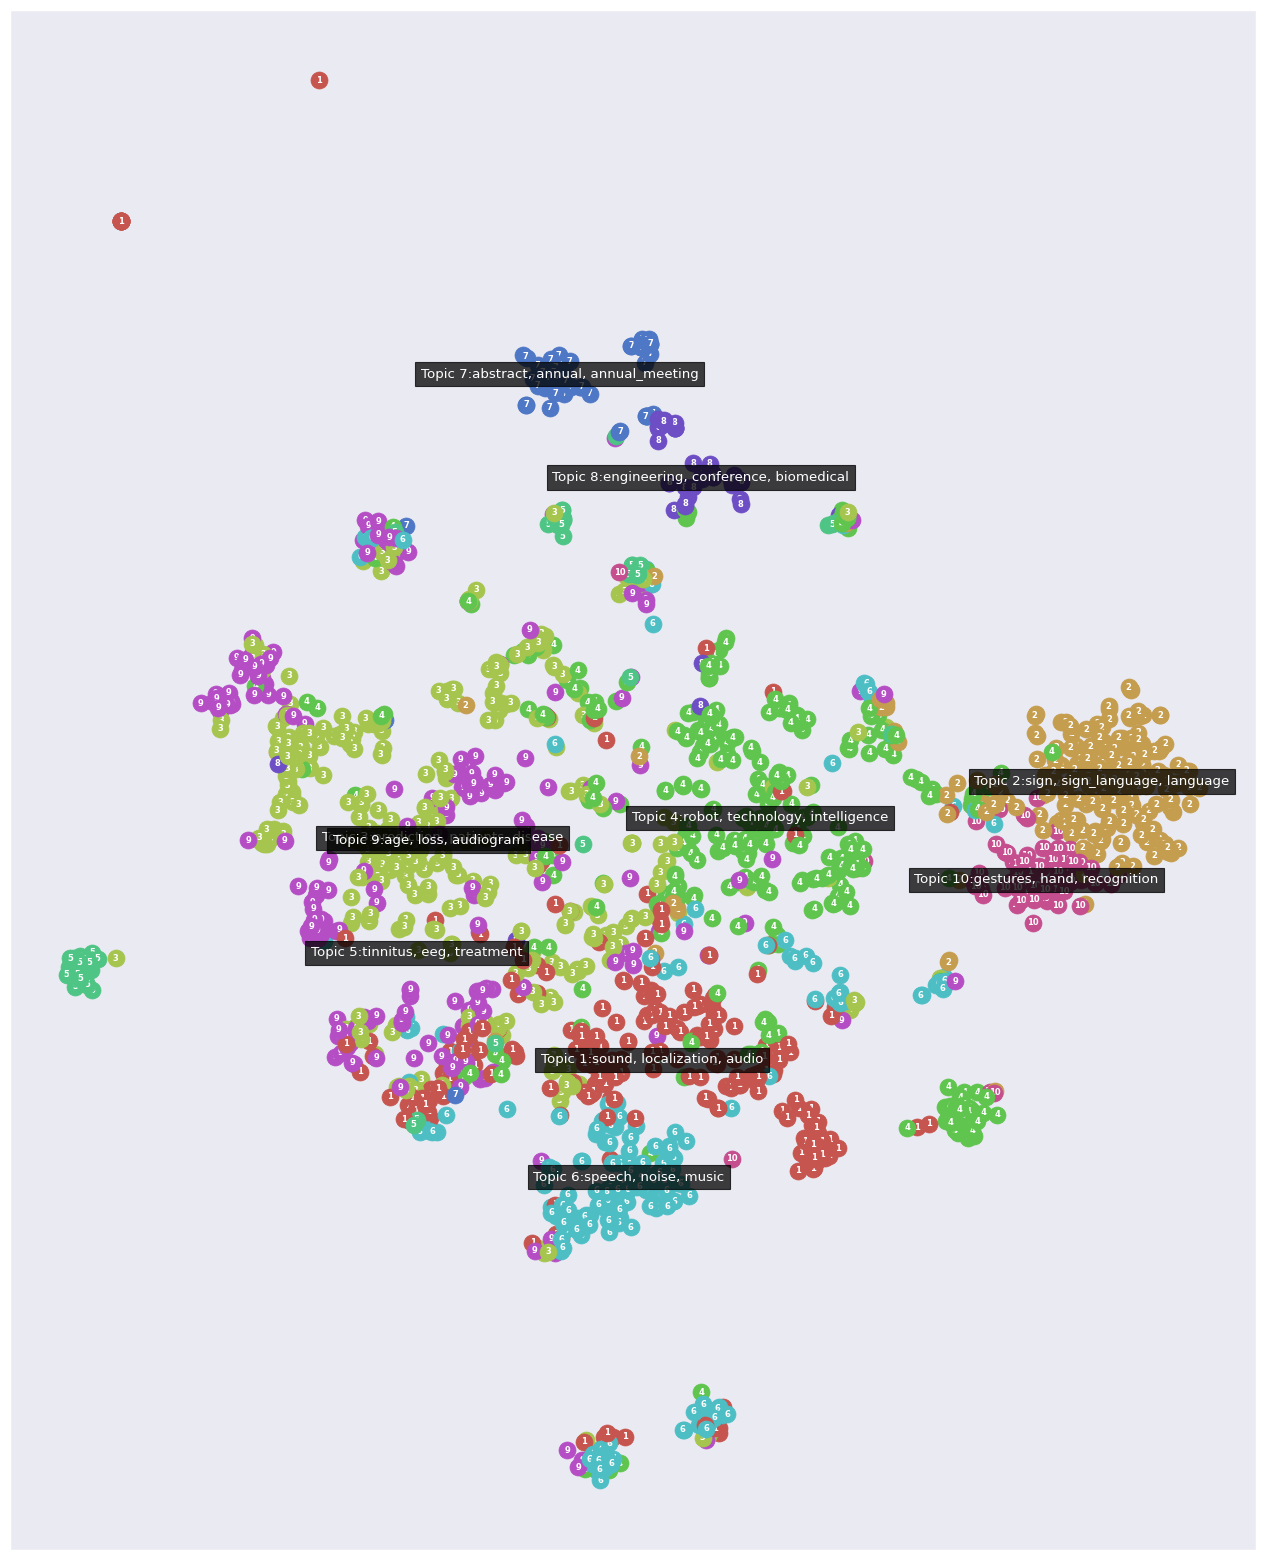

In [ ]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

In [ ]:
topic_id = topic_model.best_topic_for_token('artificial_intelligence')


In [ ]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

Information Systems and Technologies
Sonic Interactions in Virtual Environments
New Realities, Mobile Systems and Applications
Virtual, Augmented and Mixed Reality
Smart Villages
Artificial Intelligence and Technologies
Biomimetic and Biohybrid Systems
Application Research of Virtual Reality Technology
Augmented/Virtual Reality: Technological Advancement with Use Cases
Sensing Technology


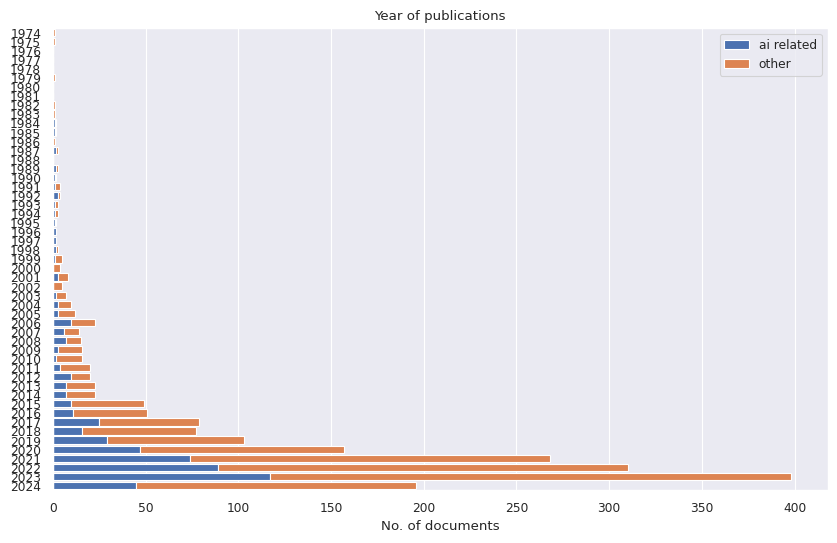

In [ ]:
threshold = 0.2
ai_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('ai_topic', ai_topic)


groups = {
    'ai related': 'ai_topic',
    'other': 'not ai_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

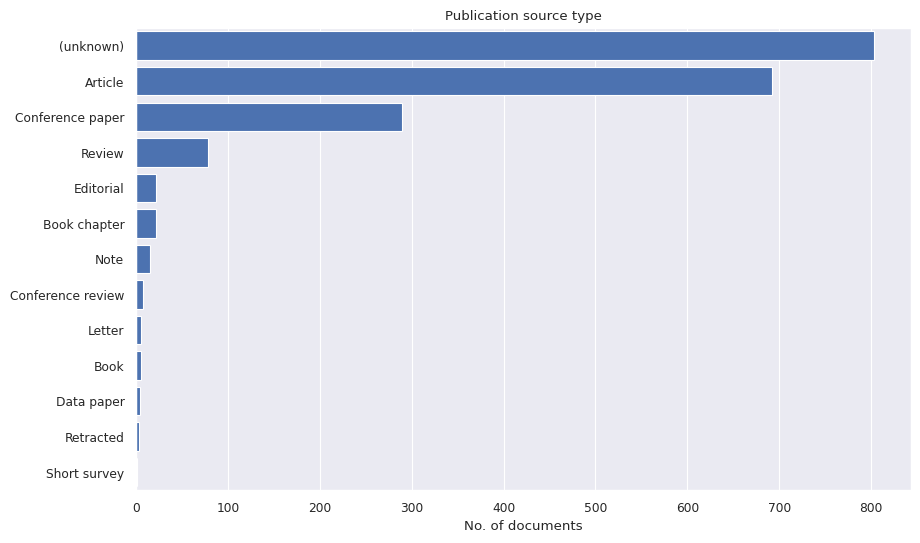

In [ ]:
litstudy.stats.compute_source_type_histogram(docs);
litstudy.plot.plot_source_type_histogram(docs);
